In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
import math

In [ ]:
img = cv2.imread("./runs/detect/lp_black_640/use001-13957-1-crop0.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show

In [ ]:
img.shape
340/img.shape[1]

In [ ]:
mulsize = math.ceil(340/img.shape[1])
print(mulsize)
img = cv2.resize(img, None, fx = mulsize, fy = mulsize)
plt.imshow(img)
plt.show

In [ ]:
img = cv2.fastNlMeansDenoising(img,None)

In [ ]:
ret, img = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
gray = np.float32(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) #for plot show only
plt.imshow(img)
plt.show

In [ ]:

#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i in range(1, len(corners)):
    print(corners[i])
#img[dst>0.1*dst.max()]=[0,0,255]
x = [i[0] for i in  corners]
y = [i[1] for i in  corners]


x


In [ ]:
y

In [ ]:
conne = list(corners)
superleft1 = conne.pop(x.index(min(x)))
del(x[x.index(min(x))])
superleft2 = conne.pop(x.index(min(x)))
del(x[x.index(min(x))])
print(superleft1, superleft2)
superright1 = conne.pop(x.index(max(x)))
del(x[x.index(max(x))])
superright2 = conne.pop(x.index(max(x)))
print(superright1, superright2)


In [ ]:
img = cv2.circle(img, (int(superright1[0]), int(superright1[1])), radius=0, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, (int(superright2[0]), int(superright2[1])), radius=0, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, (int(superleft1[0]), int(superleft1[1])), radius=0, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, (int(superleft2[0]), int(superleft2[1])), radius=0, color=(0, 0, 255), thickness=-1)

In [ ]:
plt.imshow(img)
plt.show

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("./runs/detect/lp_black_640/use001-13957-1-crop0.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret, gray = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),0,255,-1)
plt.imshow(img),plt.show()


In [ ]:
! pip install deskew

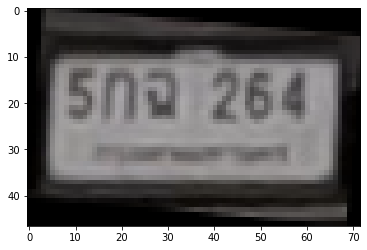

(<matplotlib.image.AxesImage at 0x1a27f513f70>, None)

In [1]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew
import matplotlib.pyplot as plt

def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

image = cv2.imread("./runs/detect/lp_black_640/use001-13957-1-crop0.png")
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(grayscale)
img = rotate(image, angle, (0, 0, 0))

plt.imshow(img),plt.show()

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i in range(1, len(corners)):
    print(corners[i])
#img[dst>0.1*dst.max()]=[0,0,255]
x = [i[0] for i in  corners]
y = [i[1] for i in  corners]

[ 8.489362 11.246256]
[35.  10.5]
[39. 11.]
[ 8.488082  11.2459345]
[19.182554 11.331842]
[29.034483 16.37931 ]
[37. 12.]
[46.99848  13.442726]
[46.99846  13.442702]
[64.496994 11.543047]
[19.182507 11.33195 ]
[47.28225   13.2755575]
[64.49324  11.543839]
[18.  17.5]
[23.333334 17.333334]
[40.5 16.5]
[ 8.072855 19.628464]
[15.432071 21.42952 ]
[51.669937 21.198418]
[ 8.073424 19.628256]
[54.659134 20.886206]
[16.189524 20.498566]
[22.2 23.4]
[27.786638 20.928453]
[27.786606 20.928473]
[40.5 23.5]
[44. 23.]
[54.659122 20.886211]
[18.4347   34.749607]
[18.43499  34.749638]
[30.510027 32.626637]
[43.14219  30.237532]
[44.333    33.336258]
[44.33301 33.33606]
[55.123947 33.80426 ]
[ 4.7521744 34.662148 ]
[18.43513  34.749645]
[64.42415 35.42415]


In [3]:
crop = img[int(min(y)): int(max(y)), int(min(x)): int(max(x)) ]

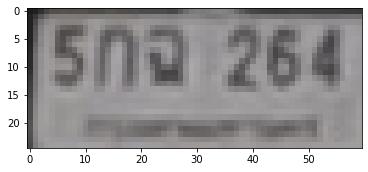

(<matplotlib.image.AxesImage at 0x1a27f61dfd0>, None)

In [4]:
plt.imshow(crop),plt.show()

5


<function matplotlib.pyplot.show(close=None, block=None)>

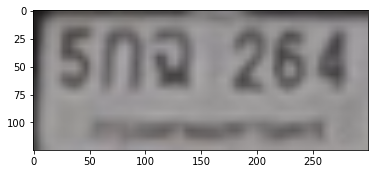

In [5]:
mulsize = math.ceil(340/img.shape[1])
print(mulsize)
img = cv2.resize(crop, None, fx = mulsize, fy = mulsize)
plt.imshow(img)
plt.show


In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.fastNlMeansDenoising(img,None)

ret, img = cv2.threshold(img,112,255,cv2.THRESH_BINARY)

for show only

<function matplotlib.pyplot.show(close=None, block=None)>

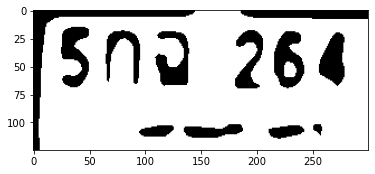

In [7]:
show = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) #for plot show only
plt.imshow(show)
plt.show